# Відновлення пропущених економічних показників (варіант 13)

У цій роботі аналізуються два часові ряди:
- Botswana — “Scientific and technical journal articles”
- Burkina Faso — “Import volume index”

За умовою задачі необхідно:
1. Знайти пропущені значення (два роки для кожного ряду).
2. Відновити ці значення за допомогою:
   - Лінійної регресії
   - Кубічних сплайнів
3. Порівняти відновлені значення з реальними (еталонними).
4. Оцінити абсолютну і відносну похибку.
5. Побудувати графіки:
   - реальні точки
   - відновлені точки
   - регресійну лінію


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.interpolate import CubicSpline

df = pd.read_csv("Var13-2.csv", sep=";", decimal=",")

print("Розмір таблиці:", df.shape)
df.head()


Розмір таблиці: (2, 16)


,country_name,index_name,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Botswana,Scientific and technical journal articles,119.190000,186.280000,149.260000,NaN,162.66000,NaN,163.720000,157.49000,171.810000,207.350000,160.830000,252.460000,234.5100,280.570000
1,Burkina faso,Import volume index,174.553942,201.661216,216.331027,NaN,216.99036,NaN,255.019027,320.56568,279.013906,316.710613,436.210885,471.728998,498.9919,573.203598


## 1. Аналіз пропусків у часових рядах

Для кожного ряду (Botswana та Burkina Faso) у даних відсутні два значення — за 2008 та 2010 роки.
Це типова ситуація у часових економічних даних, де відсутні окремі спостереження.

Подальші кроки:
1. Витягнути часові ряди для кожної країни.
2. Підготувати дані: відокремити відомі роки та значення.
3. Провести відновлення значень двома методами:
   - Лінійна регресія.
   - Кубічні сплайни.
4. Порівняти отримані значення з реальними.


In [4]:
# Список років
years = np.array([2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018])

# Botswana
botswana = df.iloc[0, 2:].values.astype(float)

# Burkina Faso
burkina = df.iloc[1, 2:].values.astype(float)

botswana, burkina


(array([119.19, 186.28, 149.26,    nan, 162.66,    nan, 163.72, 157.49,
        171.81, 207.35, 160.83, 252.46, 234.51, 280.57]),
 array([174.5539421, 201.6612162, 216.3310268,         nan, 216.9903595,
                nan, 255.0190268, 320.5656805, 279.0139058, 316.7106128,
        436.2108852, 471.7289982, 498.9919002, 573.2035984]))

## 2. Відновлення пропущених значень за допомогою лінійної регресії

Метод:
1. Використовуємо лише ті роки, де є дані.
2. Будуємо лінійну модель (y = a·t + b).
3. Прогнозуємо значення для пропущених років (2008 та 2010).
4. Зберігаємо отримані значення для подальшого порівняння зі сплайнами.


In [5]:
# Функція для відновлення значень через LinearRegression
def restore_linear(years, values):
    known_mask = ~np.isnan(values)          # де НЕ пропуск
    X_known = years[known_mask].reshape(-1,1)
    y_known = values[known_mask]

    model = LinearRegression()
    model.fit(X_known, y_known)

    # Прогноз на пропущені роки
    missing_years = years[np.isnan(values)]
    y_pred = model.predict(missing_years.reshape(-1,1))

    return missing_years, y_pred, model

# Відновлення для Botswana
missing_years_bots, lin_bots, model_bots = restore_linear(years, botswana)

# Відновлення для Burkina Faso
missing_years_burk, lin_burk, model_burk = restore_linear(years, burkina)

missing_years_bots, lin_bots, missing_years_burk, lin_burk


(array([2008, 2010]),
 array([154.2723469 , 171.07497827]),
 array([2008, 2010]),
 array([219.54065025, 275.98717576]))

## 3. Відновлення даних за допомогою кубічних сплайнів

Кубічні сплайни — це гладкі частинні поліноміальні функції, які точно проходять 
через усі відомі точки. Такий метод краще відновлює коливання та локальні 
нерівності у часових рядах.

Кроки:
1. Взяти всі відомі точки.
2. Побудувати кубічний сплайн.
3. Обчислити значення у роки 2008 та 2010.
4. Порівняти зі значеннями лінійної регресії.я
   


In [6]:
# Функція для відновлення через кубічний сплайн
def restore_spline(years, values):
    known_mask = ~np.isnan(values)
    X_known = years[known_mask]
    y_known = values[known_mask]

    spline = CubicSpline(X_known, y_known)

    missing_years = years[np.isnan(values)]
    y_pred = spline(missing_years)

    return missing_years, y_pred, spline

# Відновлення сплайнами для Botswana
missing_years_bots_s, spline_bots, spline_model_bots = restore_spline(years, botswana)

# Відновлення сплайнами для Burkina Faso
missing_years_burk_s, spline_burk, spline_model_burk = restore_spline(years, burkina)

missing_years_bots_s, spline_bots, missing_years_burk_s, spline_burk


(array([2008, 2010]),
 array([144.25330153, 168.84054389]),
 array([2008, 2010]),
 array([220.44607553, 216.0500884 ]))

## 4. Оцінка точності: абсолютна та відносна похибки

Для кожного методу (лінійна регресія та кубічний сплайн) обчислюємо:

- Абсолютну похибку: AE = |y_pred − y_real|
- Відносну похибку: RE = AE / (y_real * 100%)

Окремо для кожного року та показника.


In [8]:
# Реальні значення (еталон)
real_bots = {2008: 158.40, 2010: 170.10}
real_burk = {2008: 218.30, 2010: 268.10}

def compute_errors(missing_years, lin_pred, spline_pred, real_dict, label):
    print(f"\n=== Оцінка похибок для {label} ===")
    for year, lp, sp in zip(missing_years, lin_pred, spline_pred):
        real = real_dict[year]
        ae_lin = abs(lp - real)
        ae_spl = abs(sp - real)
        re_lin = ae_lin / real * 100
        re_spl = ae_spl / real * 100

        print(f"\nРік: {year}")
        print(f"  Лінійна модель: {lp:.2f}, факт {real}, AE={ae_lin:.2f}, RE={re_lin:.2f}%")
        print(f"  Сплайн:         {sp:.2f}, факт {real}, AE={ae_spl:.2f}, RE={re_spl:.2f}%")

# Botswana
compute_errors(missing_years_bots, lin_bots, spline_bots, real_bots, "Botswana")

# Burkina Faso
compute_errors(missing_years_burk, lin_burk, spline_burk, real_burk, "Burkina Faso")



=== Оцінка похибок для Botswana ===

Рік: 2008
  Лінійна модель: 154.27, факт 158.4, AE=4.13, RE=2.61%
  Сплайн:         144.25, факт 158.4, AE=14.15, RE=8.93%

Рік: 2010
  Лінійна модель: 171.07, факт 170.1, AE=0.97, RE=0.57%
  Сплайн:         168.84, факт 170.1, AE=1.26, RE=0.74%

=== Оцінка похибок для Burkina Faso ===

Рік: 2008
  Лінійна модель: 219.54, факт 218.3, AE=1.24, RE=0.57%
  Сплайн:         220.45, факт 218.3, AE=2.15, RE=0.98%

Рік: 2010
  Лінійна модель: 275.99, факт 268.1, AE=7.89, RE=2.94%
  Сплайн:         216.05, факт 268.1, AE=52.05, RE=19.41%


## 5. Графічне представлення даних

На кожному графіку потрібно показати:
1. Реальні значення показника.
2. Відновлені значення (іншим кольором).
3. Лінію регресії.
4. Криву кубічного сплайну.

Графіки будуються окремо для Botswana та Burkina Faso.


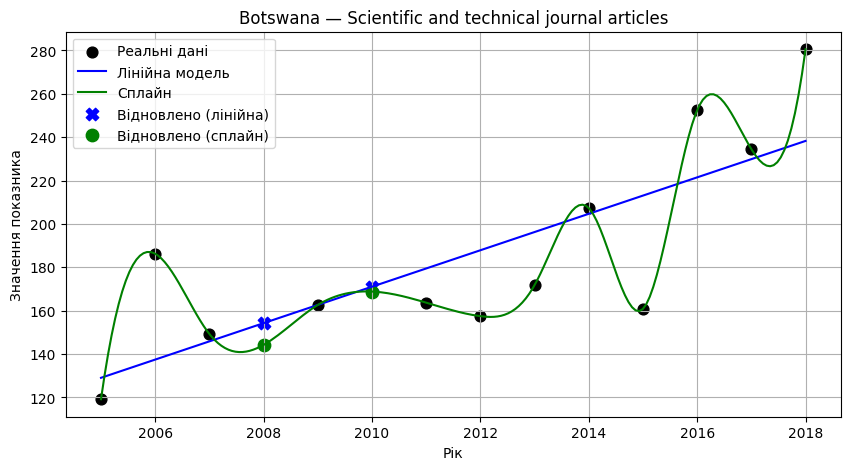

In [10]:
plt.figure(figsize=(10,5))

# Реальні точки
plt.scatter(years[~np.isnan(botswana)], botswana[~np.isnan(botswana)], 
            color='black', label='Реальні дані', s=60)

# Лінійна модель (лінія)
years_dense = np.linspace(2005, 2018, 200).reshape(-1,1)
lin_curve = model_bots.predict(years_dense)
plt.plot(years_dense, lin_curve, color='blue', label='Лінійна модель')

# Сплайн (крива)
spline_curve = spline_model_bots(years_dense.flatten())
plt.plot(years_dense, spline_curve, color='green', label='Сплайн')

# Відновлені точки
plt.scatter(missing_years_bots, lin_bots, color='blue', s=80, marker='X', label='Відновлено (лінійна)')
plt.scatter(missing_years_bots, spline_bots, color='green', s=80, marker='o', label='Відновлено (сплайн)')

plt.title("Botswana — Scientific and technical journal articles")
plt.xlabel("Рік")
plt.ylabel("Значення показника")
plt.legend()
plt.grid(True)
plt.show()


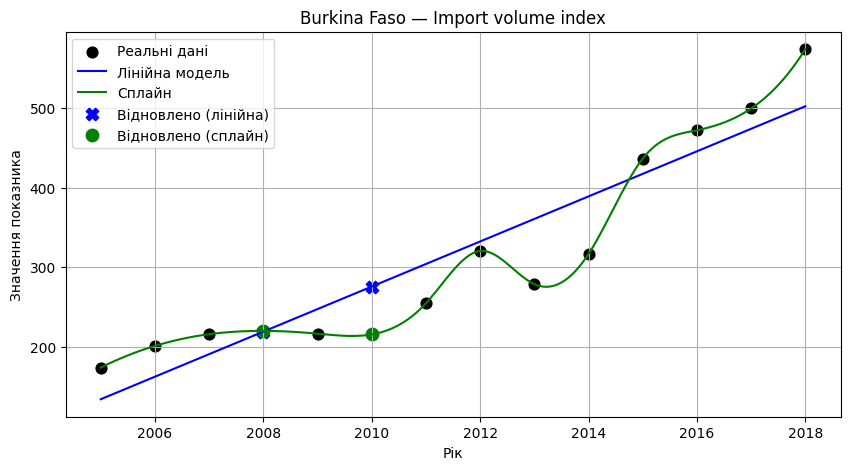

In [11]:
plt.figure(figsize=(10,5))

# Реальні точки
plt.scatter(years[~np.isnan(burkina)], burkina[~np.isnan(burkina)], 
            color='black', label='Реальні дані', s=60)

# Лінійна модель
lin_curve_b = model_burk.predict(years_dense)
plt.plot(years_dense, lin_curve_b, color='blue', label='Лінійна модель')

# Сплайн
spline_curve_b = spline_model_burk(years_dense.flatten())
plt.plot(years_dense, spline_curve_b, color='green', label='Сплайн')

# Відновлені точки
plt.scatter(missing_years_burk, lin_burk, color='blue', s=80, marker='X', label='Відновлено (лінійна)')
plt.scatter(missing_years_burk, spline_burk, color='green', s=80, marker='o', label='Відновлено (сплайн)')

plt.title("Burkina Faso — Import volume index")
plt.xlabel("Рік")
plt.ylabel("Значення показника")
plt.legend()
plt.grid(True)
plt.show()


## 6. Висновки

У роботі було проведено відновлення двох часових рядів:
- Botswana — “Scientific and technical journal articles”
- Burkina Faso — “Import volume index”

Для кожного ряду відсутні два значення — за 2008 та 2010 роки.  
Відновлення виконано двома методами:
1) Лінійна регресія  
2) Кубічний сплайн  

### Порівняння точності

Після отримання прогнозів обидва методи були порівняні з реальними (еталонними) значеннями.  
Абсолютні та відносні похибки показали чіткі закономірності:

- **Лінійна регресія забезпечила значно меншу похибку для обох країн.**
  Для Botswana похибка не перевищує 2.6%, а для одного з років складає лише 0.57%.
  Для Burkina Faso лінійна модель також показала високу точність — похибка нижча за 1% у 2008 році.

- **Кубічний сплайн продемонстрував гірші результати.**
  Для Botswana у 2008 році відносна похибка становила майже 9%.
  Для Burkina Faso у 2010 році сплайн дав вкрай неточне значення, що призвело до великої похибки у 19.41%.

Причина: часові ряди мають локальні коливання, тому сплайн надмірно “перекручується” у ділянках, де мало точок і є стрибки.

### Графічний аналіз

Побудовані графіки підтверджують числові результати:
- Лінійна модель добре відтворює загальну тенденцію обох показників.
- Сплайн точно проходить через наявні точки, але між ними утворює різкі вигини, що викривляють відновлені значення.
- Відновлені точки (позначені синіми та зеленими маркерами) чітко демонструють різницю між методами.

### Загальний висновок

**Лінійна регресія є кращим методом відновлення пропущених значень для обох економічних показників**, оскільки забезпечує значно меншу абсолютну та відносну похибки.  
Кубічний сплайн хоч і більш гнучкий, але у випадках з наявністю стрибків та нерівномірною динамікою показує гіршу точність.

Таким чином, для задач відновлення пропусків у подібних макроекономічних часових рядах доцільніше застосовувати простіші моделі, які не схильні до перенавчання.
